In [108]:
!pip install yfinance
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

**Question 1 - Extracting Tesla Stock Data Using yfinance**

In [109]:
tesla = yf.Ticker ("TSLA")

tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Question 2 - Extracting Tesla Revenue Data Using Webscraping**

In [110]:
url = "https://stockanalysis.com/stocks/tsla/revenue/"

response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

table_body = soup.find('tbody')

ts_data = []

for row in table_body.find_all('tr'):
    cells = row.find_all('td')
    year = cells[0].text.strip()
    revenue = cells[1].text.strip()
    
    ts_data.append({'Date': year, 'Revenue': revenue})

tesla_df = pd.DataFrame(ts_data)

tesla_df

,Date,Revenue
0,"Dec 31, 2022",81.46B
1,"Dec 31, 2021",53.82B
2,"Dec 31, 2020",31.54B
3,"Dec 31, 2019",24.58B
4,"Dec 31, 2018",21.46B
5,"Dec 31, 2017",11.76B
6,"Dec 31, 2016",7.00B
7,"Dec 31, 2015",4.05B
8,"Dec 31, 2014",3.20B
9,"Dec 31, 2013",2.01B


**Question 3 - Extracting GameStop Stock Data Using yfinance**

In [111]:
tesla = yf.Ticker ("GME")

gameStone_data = tesla.history(period="max")

gameStone_data.reset_index(inplace=True)
gameStone_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Question 4 - Extracting GameStop Revenue Data Using Webscraping**

In [112]:
url = "https://stockanalysis.com/stocks/gme/revenue/"

response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

table_body = soup.find('tbody')

gs_data = []

for row in table_body.find_all('tr'):
    cells = row.find_all('td')
    year = cells[0].text.strip()
    revenue = cells[1].text.strip()
    
    gs_data.append({'Date': year, 'Revenue': revenue})

game_df = pd.DataFrame(gs_data)

game_df

,Date,Revenue
0,"Jan 28, 2023",5.93B
1,"Jan 29, 2022",6.01B
2,"Jan 30, 2021",5.09B
3,"Feb 1, 2020",6.47B
4,"Feb 2, 2019",8.29B
5,"Feb 3, 2018",9.22B
6,"Jan 28, 2017",8.61B
7,"Jan 30, 2016",9.36B
8,"Jan 31, 2015",9.30B
9,"Feb 1, 2014",9.04B


**Question 5 - Tesla Stock and Revenue Dashboard**

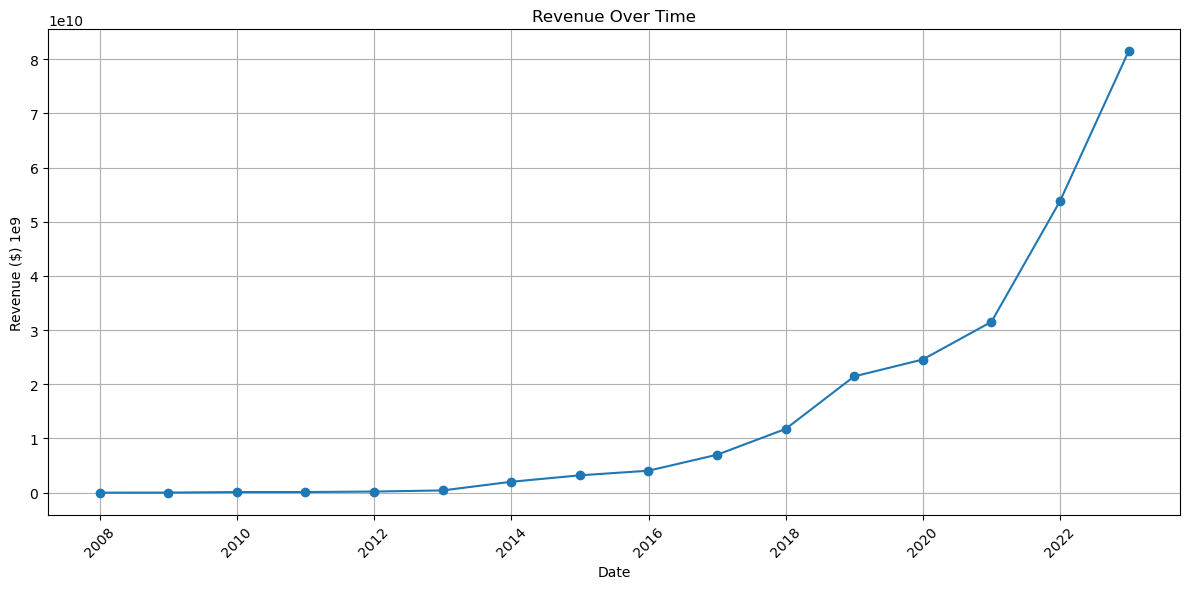

In [113]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df['Revenue'] = tesla_df['Revenue'].replace({'B': '*1e9', 'M': '*1e6', 'K': '*1e3'}, regex=True).map(pd.eval).astype(float)

# Sort DataFrame by Date
tesla_df = tesla_df.sort_values('Date')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(tesla_df['Date'], tesla_df['Revenue'], marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($) 1e9')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

**Question 6 - GameStop Stock and Revenue Dashboard**

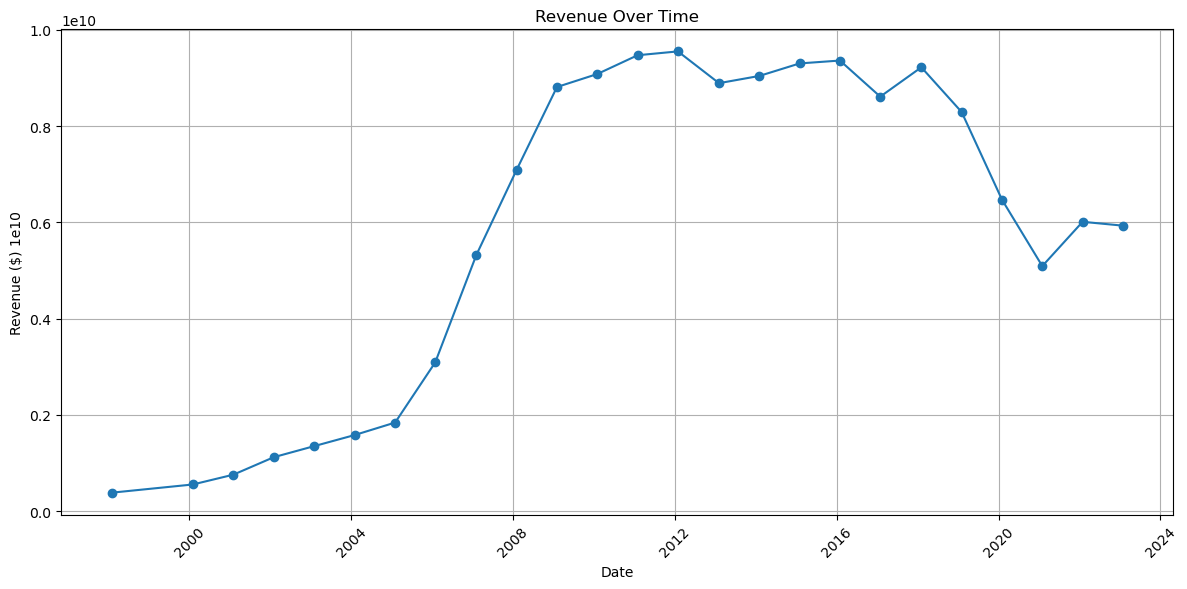

In [114]:
game_df['Date'] = pd.to_datetime(game_df['Date'])
game_df['Revenue'] = game_df['Revenue'].replace({'B': '*1e9', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)

# Sort DataFrame by Date
game_df = game_df.sort_values('Date')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(game_df['Date'], game_df['Revenue'], marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($) 1e10')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

**Question 7 - Sharing your Assignment Notebook**